### context
Based on [this paper](http://www.plantphysiol.org/content/183/2/637/tab-figures-data#fig-data-additional-files) we want to see in what category our Azolla MYC-likes fall, perhaps reproduce some trees and check if the shared domains coïncide with what is described in the paper. 

### this notebook
In the previous notebook, I confirmed I can align and differentiate the two subfamilies of sequences based on the J&R paper. Here I'm correcting some minor mistakes, and I'm adding some extra sequences of interest.


# 0 Acquire data

### As in step 1
 * **CHBRA15G00250 Cbrduo1   -> "g8575"**
 * **LC221833 CauDUO1**
 * **LC221832 CleDUO1**
 * **GFZG01001741.1**
 * **Mapoly0017s0071**
 * **XM_024688710.1**
 * **XM_024668389.1**
 * **Sacu_v1.1_s1503.g028048**
 * **Sacu_v1.1_s0147.g023157**
 * **MA_130648g0010**
 * **AmTr_v1.0_scaffold00111.43**
 
And for Subfamily VII
 * DN3051_co_g1_i1
 * **HAOX-0009745**
 * **Mapoly1089s0002** 
 * **MN199011**
 * **Sacu_v1.1_s0002.g001222**
 * **Sacu_v1.1_s0041.g012546**
 * **Sacu_v1.1_s0272.g027033**
 * **MA_96853g0010**
 * **MA_10208000g0010**
 * **MA_20462g0010**
 * **AmTr_v1.0_scaffold00038.91**
 * **AmTr_v1.0_scaffold00037.85**

### Changed in step 2
Added: Azolla MYB like sequences and Arabidopsis GAMYB: MYB33. Azolla sequences were retrieved from fernbase.org; the arabidopsis sequence from uniprot.

Second I'm replacing `XM_024688710` with `XM_024688730.1` 1. This was a typo in the last itteration of this workflow. Also I'm removing `GFZG01001741.1_rf_1_GFZG01001741.1_TSA` for this sequences behaves oddly in the tree and doesn quite fit in the alignment. I think it is something different that doesn't belong here.It was an algeal sequence so I might be too cautious here...







Now to proceed, let's 
 0. ~~Acquire data~~
 1. linearise and combine
 2. allign
 3. identify domains
 4. add Azolla sequences and repeat.
 5. for the fun of it, make a phylogenetic tree
 
 I'm using code from my phylogenetics workflow here https://github.com/lauralwd/lauras_phylogeny_wf/blob/master/tree_building_workflow.ipynb

Clean-up. Since I'm not having version2 or v3 appendices, I'm cleaning up old files to prevent confusion. These may still be retrieved from git history.

In [9]:
rm data/alignments_raw data/alignments_trimmed data/*_linear.fasta -rf analyses

# 1 linearise and combine

In [6]:
tree

.
├── data
│   ├── Azfi-v1-MYB-sequences.fasta
│   ├── MYB33_ARATH.fasta
│   ├── VII_sequences.fasta
│   └── VI_sequences.fasta
├── docs
│   └── step1_differentiate_subfamilies_VI_and_VII.html
├── envs
│   ├── conda-env-jalview.yaml
│   └── conda-env-phylogenetics.yaml
├── figures
│   └── VI-vs-VII_alignment_v1.png
├── step1_differentiate_subfamilies_VI_and_VII.ipynb
└── step2.ipynb

4 directories, 10 files


In [10]:
for i in data/*fasta
do  inseq=$(echo $i | cut -d '/' -f 2 | cut -d '.' -f 1)
    cat data/$inseq.fasta \
     | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
     > data/"$inseq"_linear.fasta
done

In [11]:
#cat data/*_sequences_linear.fasta > data/combi_sequences_linear.fasta
cat data/VII_sequences_linear.fasta | sed 's/>/>VII_/' > data/combi_sequences_linear.fasta
cat data/MYB33_ARATH_linear.fasta data/Azfi-v1-MYB-sequences_linear.fasta >> data/combi_sequences_linear.fasta
cat data/VI_sequences_linear.fasta | sed 's/>/>VI_/' >> data/combi_sequences_linear.fasta
head data/combi_sequences_linear.fasta

>VII_HAOX-0009745
GLKKGPWTAEEDVILSEYVMKHGEGNWNLIQKNTGLPRCGKSCRLRWANHLRPNLKKGAFSREEEALVIKLHAEIGNKWARMALQLPGRTDNEIKNFWNTRIKRRIRAGLPLHSTDLVLCPIATTTPFREKLTEYMEESRDTKPIDRDSDDCDGHTNSAHVKESSQT
>VII_Mp3g05910.1
MELGSAPDFSEDVGALKKGPWTSAEDAILVAYVTKHGEGNWNSVQKHSGLYRCGKSCRLRWANHLRPNLKKGAFTPEEERMIIELHAKLGNKWARMAAQLPGRTDNEIKNYWNTRIKRRMRAGLPVYPPEMQNPAANSQYLFEHGEMSMSSGGESECDPGSSPSTGDFQNLSVSGMHGGCRMKSCSSLTGMSDLPLSSVVTQTLSAGQSISSPGRRMKRMHRDTQCSSMSGASGGGGLFPQLSDESSKTMPYFKARRSCGTRNSMRLAQIAGFPYDPDPEGLHFEGMPNHGYLNLPPFSCSRPNSSLKLELPSSQSAESADSAGTPGSAMTSPYTAFSLPQNHHLLSSEADSFGSNNSNNSSFLQALLQEAQNLDPGRDQIRSAELSDQLLVLTSANPPMDVSALMSPRKSRWGEDSDPTTPLEGRTYSMFSEDTSPNCTSNWDETSTLQSPLTTVSSNLQAAHVGGLKIENSAQHDMPCGNYGDEENLISSLLDFARPDATPVVEWYNPPDVYTLGGQPCHSLPEAIEAAFHHQDVVAELEHLGAAGHPVANHVWELGSCPWNNMPGVCQLGDLPTDCRPLTSIADQMNDPCAIC
>VII_ENA|MN199011|MN199011.1 Selaginella moellendorffii
MGDPMQGGVAAAAALELCEEGRGRGGGGGAVKGLKKGPWTPSEDAILVAYVHKHGEGNWNNVQKNCGLSRCGKSCRLRWANHLRPNLKKGAFTPEEERTIIELHAKLGNKWARMASQLPGRTDNEIKNYWNTRIKRRMRAGLPV

In [12]:
tree

.
├── data
│   ├── Azfi-v1-MYB-sequences.fasta
│   ├── Azfi-v1-MYB-sequences_linear.fasta
│   ├── combi_sequences_linear.fasta
│   ├── MYB33_ARATH.fasta
│   ├── MYB33_ARATH_linear.fasta
│   ├── VII_sequences.fasta
│   ├── VII_sequences_linear.fasta
│   ├── VI_sequences.fasta
│   └── VI_sequences_linear.fasta
├── docs
│   └── step1_differentiate_subfamilies_VI_and_VII.html
├── envs
│   ├── conda-env-jalview.yaml
│   └── conda-env-phylogenetics.yaml
├── figures
│   └── VI-vs-VII_alignment_v1.png
├── step1_differentiate_subfamilies_VI_and_VII.ipynb
└── step2.ipynb

4 directories, 15 files


# 2 align

In [13]:
conda activate phylogenetics
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
for   i in data/*sequences_linear.fasta
do    inseq=$(echo $i | cut -d '/' -f 2 | cut -d '.' -f 1)
      if    [ ! -f "./data/alignments_raw/$inseq"_aligned-mafft-linsi.fasta ]
      then  linsi --thread $(nproc) data/$inseq.fasta > ./data/alignments_raw/"$inseq"_aligned-mafft-linsi.fasta \
                                                      2> ./data/alignments_raw/"$inseq"_aligned-mafft-linsi.log
      fi
done
conda deactivate

(phylogenetics) (phylogenetics) (phylogenetics) 

In [14]:
tree data

data
├── alignments_raw
│   ├── Azfi-v1-MYB-sequences_linear_aligned-mafft-linsi.fasta
│   ├── Azfi-v1-MYB-sequences_linear_aligned-mafft-linsi.log
│   ├── combi_sequences_linear_aligned-mafft-linsi.fasta
│   ├── combi_sequences_linear_aligned-mafft-linsi.log
│   ├── VII_sequences_linear_aligned-mafft-linsi.fasta
│   ├── VII_sequences_linear_aligned-mafft-linsi.log
│   ├── VI_sequences_linear_aligned-mafft-linsi.fasta
│   └── VI_sequences_linear_aligned-mafft-linsi.log
├── Azfi-v1-MYB-sequences.fasta
├── Azfi-v1-MYB-sequences_linear.fasta
├── combi_sequences_linear.fasta
├── MYB33_ARATH.fasta
├── MYB33_ARATH_linear.fasta
├── VII_sequences.fasta
├── VII_sequences_linear.fasta
├── VI_sequences.fasta
└── VI_sequences_linear.fasta

1 directory, 17 files


In [26]:
conda activate jalview
for   i in data/alignments_raw/*aligned*.fasta
do    prefix=$(echo $i | sed 's/\.fasta//')
      jalview -nodisplay \
              -open $prefix.fasta \
              -colour CLUSTAL \
              -png  $prefix.png > /dev/null 2> /dev/null
done
conda deactivate

(jalview) (jalview) 

### intermediate conclusions
Already from the alignments, I can see that one Azolla sequence shouldn't be in here so I ~~will remove~~ have removed that and reordered the alignment to place the Azolla sequences in the middle of the two subdomains.

# 3 Identify domains

## reproducing Jiang & Rao

### linsi alignments
Now let's look at the linsi alignments. If I open them in jalview, I get something like this for VI.

![VI](./data/alignments_raw/VI_sequences_linear_aligned-mafft-linsi.png)

VII
![VII](./data/alignments_raw/VII_sequences_linear_aligned-mafft-linsi.png)

and both combined
![combi](./data/alignments_raw/combi_sequences_linear_aligned-mafft-linsi.png)


There are clearly conserved domains, and especially in VI, there is a super long tail of extra sequence in one of the rows.

And I'm looking for these...
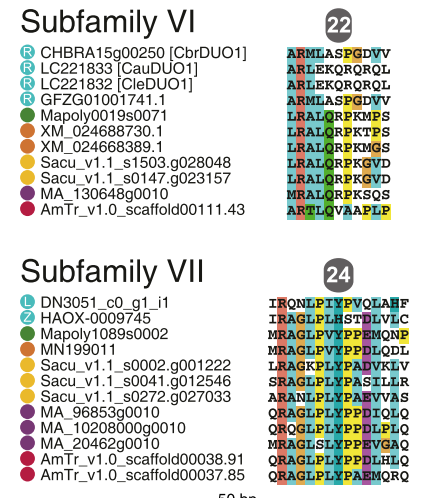

### combi alignment from step1

Now let's have a look at the combi alignment, to see if we can actually overlap these regions and use them to differentiate between the two subfamilies.

![comparison](./figures/VI-vs-VII_alignment_v1.png)

It's not exactly the comparison from the J&R paper, but I can differentiate between the two based on this domain in the linsi alignment. I proceed in a medium-convinced state


Now let's have a look at the analysis done above but with our two _Azolla_ sequences of interest, and one Arabidopsis sequence. 
![comparison](./figures/VI-vs-VII_alignment+azolla_v1.png)

When I boldly remove that gap that seems to split up this differentiating domain, it looks like so:

![comparison](./figures/VI-vs-VII_alignment+azolla_v1.1.png)

Just this alignment indicates that the Azolla sequence sof interest belong to the VII subfamily

The XM....710 sequence is still in, I thought I had removed it but somehow I managed to keep it in there... I won't change that now but remove the sequence from the tree instead.

# 4.  Combi alignment with Azolla sequences

as done above

# 5. phylogeny

Now let's run the phylogenies again on these two new alignments

## 5.1 trimming

In [18]:
conda activate phylogenetics
if    [ ! -d data/alignments_trimmed ]
then  mkdir  data/alignments_trimmed 
fi

# define appendix only once here:
trimappendix='trim-gt4'

inseq=combi_sequences_linear
for a in "data/alignments_raw/$inseq"_aligned*.fasta
do  appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    if    [ ! -f data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta ]
    then  echo "trimming alignment $a"
          sed -i 's/ /_/g' $a
          trimal -in $a   \
                 -out data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta \
                 -gt .4 \
                 -htmlout data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".html
    fi
done
conda deactivate

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) trimming alignment data/alignments_raw/combi_sequences_linear_aligned-mafft-linsi.fasta
(phylogenetics) 

In [25]:
conda activate jalview
for   i in data/alignments_trimmed/*.fasta
do    prefix=$(echo $i | sed 's/\.fasta//')
      jalview -nodisplay \
              -open $prefix.fasta \
              -colour CLUSTAL \
              -png  $prefix.png > /dev/null 2> /dev/null
done
conda deactivate

(jalview) (jalview) 

In [22]:
tree data/alignments_trimmed

data/alignments_trimmed
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt4.html
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt4.png
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt6.fasta
├── combi_sequences_linear_aligned-mafft-linsi_trim-gt6.html
└── combi_sequences_linear_aligned-mafft-linsi_trim-gt6.png

0 directories, 6 files


For gap threshold 60%
![trimmed alignment](data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt6.png)

For gap threshold 40%
![trimmed alignment](data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt4.png)

All allignments contain the differentiating domain as published in J&R. 40% is too gappy for my taste, so I will take the 60% all for tree inference. However, supervisor will like 40% better so I'll run that too.

## 5.2 tree inference

In [27]:
inseq=combi_sequences_linear
echo $inseq

combi_sequences_linear


In [28]:
ls data/alignments_trimmed/"$inseq"_aligned*gt[46].fasta

data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta
data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt6.fasta


In [29]:
conda activate phylogenetics
for a in data/alignments_trimmed/"$inseq"_aligned*gt[46].fasta
do  #iqpendix='iqtree-b100'
    iqpendix='iqtree-bb2000-alrt2000'

    echo "making a tree of file $a"
    echo "The first lines of alignment $a look like this"
    head $a

    file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    
    if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
    then echo "Making a directory $file_appendix to store trees (name based on alignment filename)"
         mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
    fi

    iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
    if   [ ! -f "$iqprefix".tree ]
    then nice iqtree -s $a \
                     -m MFP \
                     -bb 2000 -alrt 2000 \
                     -nt AUTO \
                     -ntmax $(nproc)  \
                     -pre  "$iqprefix" \
                     2>   "$iqprefix".stderr \
                      >    "$iqprefix".stdout
    #cat "$iqprefix".log | mail -s "IQtree_run $a" laura
    fi
done
conda deactivate

(phylogenetics) making a tree of file data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta
The first lines of alignment data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta look like this
>VII_HAOX-0009745
----------------------------------GLKKGPWTAEEDVILSEYVMKHGEGN
WNLIQKNTGLPRCGKSCRLRWANHLRPNLKKG-AFSREEEALVIKLHAEIGNKWARMALQ
LPGRTDNEIKNFWNTRIKRRIRAG-LPLHSTDLVLCPIATTTREKLTEYMEESRDTKPID
RDSDDCDGHTNSHVKESSQT----------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
-----------------------------------------------------------
Making a directory aligned-mafft-linsi_trim-gt4 to store trees (name based on alignment filename)
making a tree of file data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_t

In [30]:
conda activate phylogenetics
for a in data/alignments_trimmed/"$inseq"_aligned*gt[46].fasta
do  iqpendix='iqtree-b100'
    #iqpendix='iqtree-bb2000-alrt2000'

    echo "making a tree of file $a"
    echo "The first lines of alignment $a look like this"
    head $a

    file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    
    if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
    then echo "Making a directory $file_appendix to store trees (name based on alignment filename)"
         mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
    fi

    iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
    if   [ ! -f "$iqprefix".tree ]
    then nice iqtree -s $a \
                     -m MFP \
                     -b 100 \
                     -nt AUTO \
                     -ntmax $(nproc)  \
                     -pre  "$iqprefix" \
                     2>   "$iqprefix".stderr \
                      >    "$iqprefix".stdout
    cat "$iqprefix".log | mail -s "IQtree_run $a" laura
    fi
done
conda deactivate

(phylogenetics) making a tree of file data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta
The first lines of alignment data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt4.fasta look like this
>VII_HAOX-0009745
----------------------------------GLKKGPWTAEEDVILSEYVMKHGEGN
WNLIQKNTGLPRCGKSCRLRWANHLRPNLKKG-AFSREEEALVIKLHAEIGNKWARMALQ
LPGRTDNEIKNFWNTRIKRRIRAG-LPLHSTDLVLCPIATTTREKLTEYMEESRDTKPID
RDSDDCDGHTNSHVKESSQT----------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
-----------------------------------------------------------
making a tree of file data/alignments_trimmed/combi_sequences_linear_aligned-mafft-linsi_trim-gt6.fasta
The first lines of alignment data/alignments_trimmed/combi_sequences_linear_aligned-

## 5.3 tree results

Uploading the trees to iToL, see links.

### 40% gt
Red is VI

Green is VII

gt 40% propper bootstraps:
![](analyses/combi_sequences_linear_trees/aligned-mafft-linsi_trim-gt4/combi_sequences_linear_aligned-mafft-linsi_trim-gt4_iqtree-b100.svg)

[propper bootstrap](https://itol.embl.de/tree/1312115964466181596025313) and [ultrafast](https://itol.embl.de/tree/1312115964273141596034188#)

### 60% gt
gt 60% propper bootstraps:
![](analyses/combi_sequences_linear_trees/aligned-mafft-linsi_trim-gt6/combi_sequences_linear_aligned-mafft-linsi_trim-gt6_iqtree-b100.svg)

[propper bootstrap](https://itol.embl.de/tree/131211596438011596027537) and [ultrafast](https://itol.embl.de/tree/1312115964275041596034191#)


# Conclusions

The selected Azolla myb sequences (candidates from RNA seq analysis fit in the VII subfamily of MYBs as identified by R&J. 
This is supported by (1) inspecting the alignment on the specific area that R&J annotated as characteristic for both sequences.
And (2) by the phylogenetic trees.
I do wonder if I should include more subfamilies in the phylogeny.

At the very least I need to remove the XM_...710 and the GFZG...1741.1 sequences still, and prepare this into a draft figure.

Another big improvement would be to clean up the sequence names with just an accession nr and add the genus and species names for better interpretation and judgement by the readers.

A figure with the tree and MSA combined could look like this:
![tree + MSA g-gt 60%](figures/VI-vs-VII+azolla_tree+MSA_v0.1.svg)